In [1]:
library(rstan)
library(bayesplot)
library(ggfortify)
library(gridExtra)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
This is bayesplot version 1.7.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting


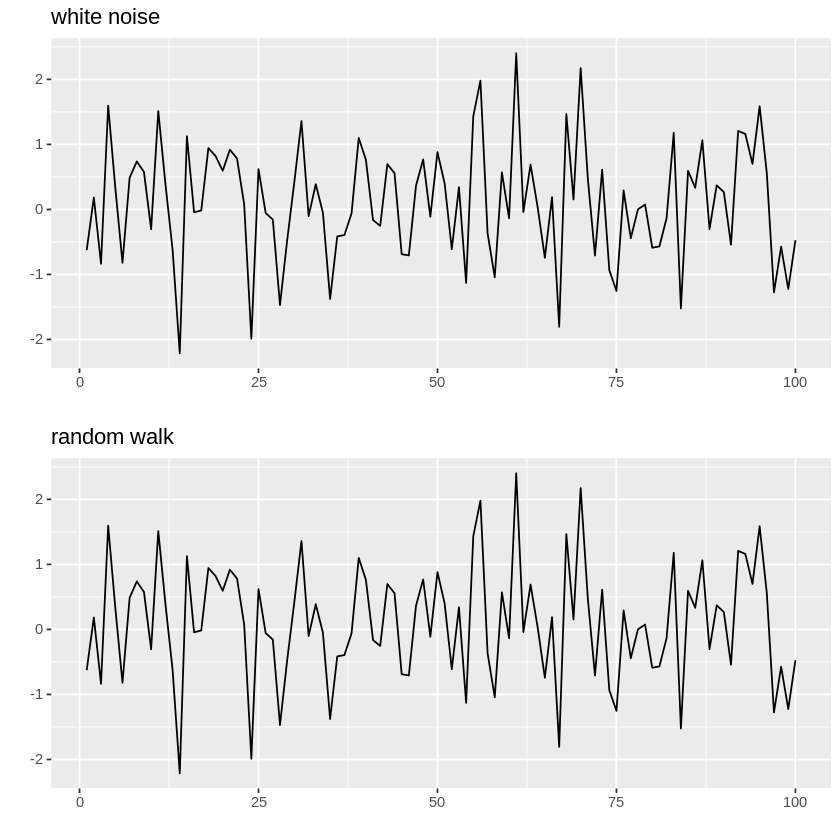

In [4]:
set.seed(1)
wn <- rnorm(n = 100, mean = 0, sd = 1)
rw <- cumsum(wn)

p_wn_1 <- autoplot(ts(wn), main = "white noise")
p_wn_2 <- autoplot(ts(wn), main = "random walk")

grid.arrange(p_wn_1, p_wn_2)

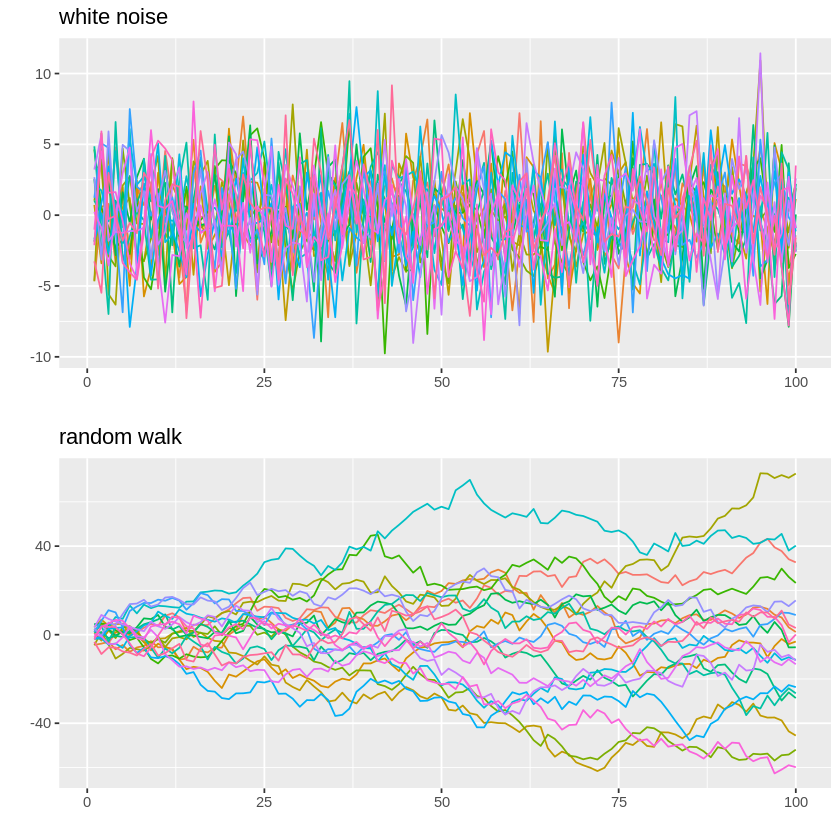

In [12]:
wn_mat <- matrix(nrow = 100, ncol = 20)
rw_mat <- matrix(nrow = 100, ncol = 20)

set.seed(1)

for(i in 1:20) {
    wn <- rnorm(n = 100, mean = 0, sd = 3)
    wn_mat[, i] <- wn
    rw_mat[, i] <- cumsum(wn)
}

p_wn_2 <- autoplot(ts(wn_mat), facets = F, main = "white noise") + theme(legend.position = "none")

p_rw_2 <- autoplot(ts(rw_mat), facets = F, main = "random walk") + theme(legend.position = "none")

grid.arrange(p_wn_2, p_rw_2)

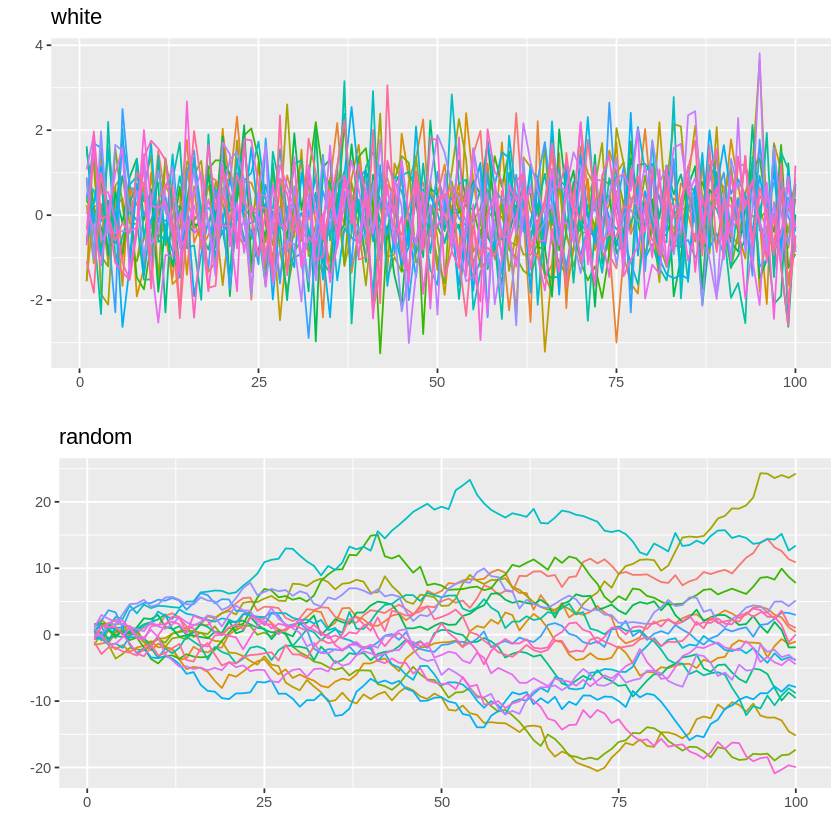

In [8]:
wn_mat <- matrix(nrow = 100, ncol = 20)
rw_mat <- matrix(nrow = 100, ncol = 20)

set.seed(1)
for(i in 1:20){
  wn <- rnorm(n = 100, mean = 0, sd = 1)
  wn_mat[,i] <- wn
  rw_mat[,i] <- cumsum(wn)
}

p_wn_2 <- autoplot(ts(wn_mat), facets = F, main = "white") + 
  theme(legend.position = 'none')

p_rw_2 <- autoplot(ts(rw_mat), facets = F, main = "random") + 
  theme(legend.position = 'none')

grid.arrange(p_wn_2, p_rw_2)


In [13]:
sales_df  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/5-2-1-sales-ts-1.csv")
sales_df$date <- as.POSIXct(sales_df$date)
head(sales_df)

date,sales
<dttm>,<dbl>
2010-01-01,23.9
2010-01-02,19.0
2010-01-03,20.3
2010-01-04,24.2
2010-01-05,19.3
2010-01-06,16.7


In [14]:
summary(sales_df)

      date                         sales      
 Min.   :2010-01-01 00:00:00   Min.   : 5.90  
 1st Qu.:2010-01-25 18:00:00   1st Qu.:11.75  
 Median :2010-02-19 12:00:00   Median :15.30  
 Mean   :2010-02-19 12:00:00   Mean   :15.50  
 3rd Qu.:2010-03-16 06:00:00   3rd Qu.:19.23  
 Max.   :2010-04-10 00:00:00   Max.   :24.20  

In [16]:
data_list <- list(
    y = sales_df$sales,
    T = nrow(sales_df)
)

local_level_stan <- stan(
    file = "5-2-1-local-level.stan",
    data = data_list,
    seed = 1
)

local_level_stan

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”

Inference for Stan model: 5-2-1-local-level.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean    sd    2.5%     25%     50%     75%   97.5% n_eff
mu[1]     21.48    0.03  1.73   18.05   20.32   21.49   22.63   24.91  4218
mu[2]     20.98    0.02  1.51   17.90   20.01   20.98   21.97   23.95  4571
mu[3]     20.92    0.02  1.40   18.17   19.97   20.91   21.86   23.76  3958
mu[4]     21.03    0.02  1.40   18.30   20.08   21.03   21.97   23.78  3457
mu[5]     20.42    0.02  1.36   17.70   19.56   20.43   21.31   23.06  3995
mu[6]     20.10    0.02  1.36   17.37   19.22   20.11   21.00   22.75  4295
mu[7]     20.53    0.03  1.38   17.98   19.60   20.50   21.43   23.34  2943
mu[8]     20.13    0.02  1.35   17.55   19.23   20.15   21.01   22.80  3475
mu[9]     19.66    0.02  1.36   17.01   18.73   19.62   20.58   22.36  3725
mu[10]    19.49    0.03  1.39   16.83   18.56   19.47   20.39   22.32  2958
m

In [17]:
print(local_level_stan,
      pars = c("s_w", "s_v", "lp__"),
      probs = c(0.025, 0.5, 0.975)
)

Inference for Stan model: 5-2-1-local-level.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
s_w     1.30    0.02  0.29    0.81    1.27    1.94   353 1.01
s_v     2.87    0.01  0.27    2.38    2.86    3.46  2521 1.00
lp__ -225.94    1.00 17.97 -260.42 -226.42 -189.06   323 1.01

Samples were drawn using NUTS(diag_e) at Sat Jul 27 12:52:11 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [18]:
mcmc_sample <- rstan::extract(local_level_stan)

state_name <- "mu"

quantile(mcmc_sample[[state_name]][, 1], probs = c(0.025, 0.5, 0.975))

2.5%      50%    97.5% 
18.05293 21.49344 24.91181

In [19]:
result_df <- data.frame(
    t(apply(
        X = mcmc_sample[[state_name]],
        MARGIN = 2,
        FUN = quantile,
        probs = c(0.025, 0.5, 0.975)
    ))
)

colnames(result_df) <- c("lwr", "fit", "upr")

result_df$time <- sales_df$date

result_df$obs <- sales_df$sales

head(result_df)

lwr,fit,upr,time,obs
<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
18.05293,21.49344,24.91181,2010-01-01,23.9
17.90483,20.98216,23.94784,2010-01-02,19.0
18.17367,20.90647,23.75895,2010-01-03,20.3
18.29980,21.03366,23.78102,2010-01-04,24.2
17.70340,20.43414,23.06121,2010-01-05,19.3
17.37351,20.11147,22.75204,2010-01-06,16.7


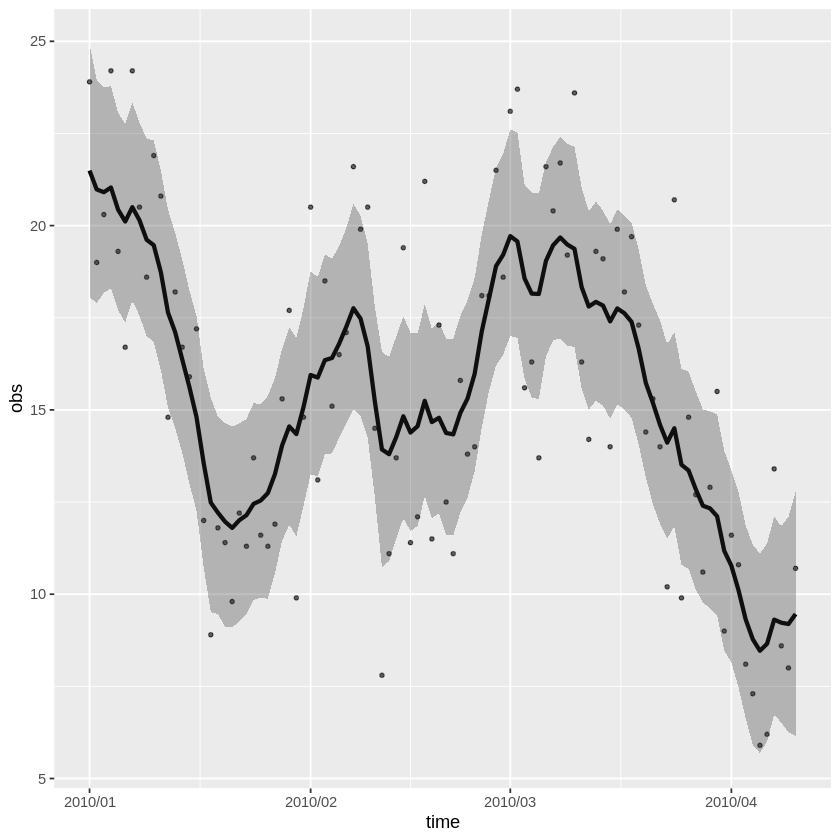

In [24]:
ggplot(
    data = result_df,
    aes(x = time, y = obs)
) + 
labs("sales") +
geom_point(alpha = 0.6, size = 0.9) +
geom_line(aes(y = fit), size = 1.2) +
geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.3) +
scale_x_datetime(date_labels = "%Y/%m")

In [25]:
plotSSM <- function(mcmc_sample, time_vec, obs_vec = NULL,
                    state_name, graph_title, y_label,
                    date_labels = "%Y/%m"){
  result_df <- data.frame(t(apply(
    X = mcmc_sample[[state_name]],
    MARGIN = 2, quantile, probs = c(0.025, 0.5, 0.975)
  )))
  
  colnames(result_df) <- c("lwr", "fit", "upr")
  
  result_df$time <- time_vec
  
  if(!is.null(obs_vec)){
    result_df$obs <- obs_vec
  }
  
  p <- ggplot(data = result_df, aes(x = time)) + 
    labs(title = graph_title) +
    ylab(y_label) +
    geom_line(aes(y = fit), size = 1.2) +
    geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.3) + 
    scale_x_datetime(date_labels = date_labels)
  
  if(!is.null(obs_vec)){
    p <- p + geom_point(alpha = 0.6, size = 0.9, 
                        data = result_df, aes(x = time, y = obs))
  }
  
  return(p)
}